In [9]:
from getDriver import getDriver
from checkStationary import ADF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import getClient

In [10]:
dataloc = getClient("MC")

In [11]:
pkid = "MasterCard Titanium Credit Card	GG0000001166	Processed-Gross Domestic Cash Volume"
tmp = pkid.split(sep="\t")

In [12]:
program  = tmp[0]
customer = tmp[1]
driver   = tmp[2]

In [13]:
country  = "United Arab Emirates"
#program  = "MasterCard World Elite Credit Programs"
#customer = "Kuwait_914110_Boubyan Bank"
#driver   = "Gross Intl Cash Volume"
typ = "P"

In [14]:
a,b = getDriver([country, program, customer, driver], typ)

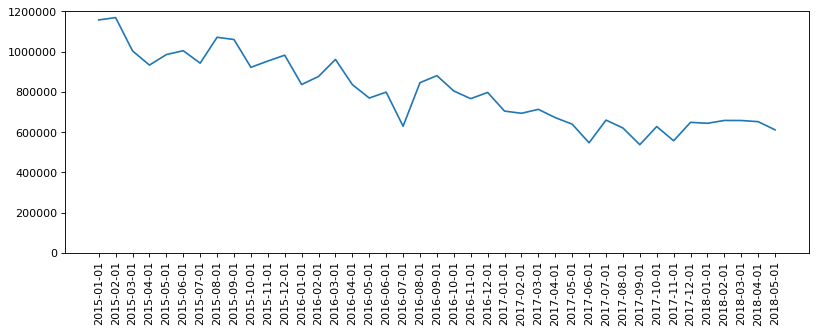

In [15]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a, b)
plt.xticks(rotation=90)
plt.ylim(0)
plt.show()

In [22]:
prt = False
CI = "5%"
test = ADF(b, CI, prt)
if test:
    print("Series is stationary")
else:
    print("Series is NOT stationary")

Series is NOT stationary


In [8]:
df = a.to_frame()
df["Amount"] = b
df.to_csv(dataloc+"UAEseries.csv", index=None)

In [9]:
df = pd.read_csv(dataloc+"UAEseries.csv")

In [46]:
test = df.tail(12)

In [13]:
X = df["Month"]
Y = df["Amount"]

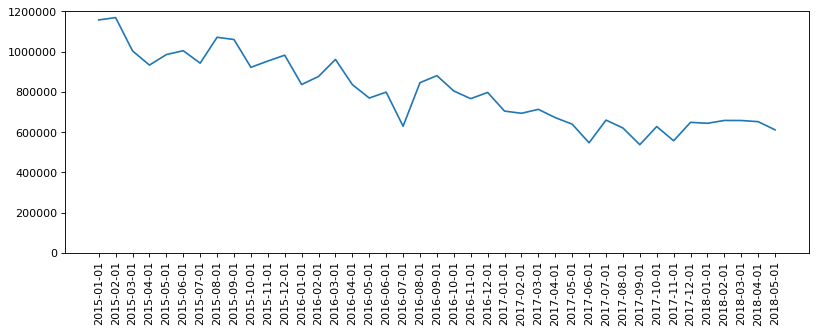

In [14]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a, b)
plt.xticks(rotation=90)
plt.ylim(0)
plt.show()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(b[:-6], freq=12, model='additive')

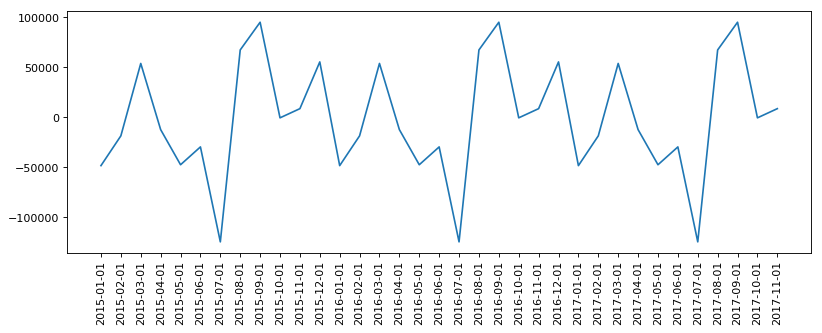

In [8]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a[:-6], result.seasonal)
plt.xticks(rotation=90)
plt.show()

In [37]:
result.seasonal[29:][:6]

29   -55688.408276
30   -67131.865852
31    49229.878468
32    41275.061403
33     8623.374808
34    -8175.284355
Name: Amount, dtype: float64